
Diabetes prediction using Machine Learning
@author- Biswas kumar




In [18]:
#pip install hyperopt

                                              0.0/1.6 MB ? eta -:--:--
     ----                                     0.2/1.6 MB 5.9 MB/s eta 0:00:01
     --------------                           0.6/1.6 MB 7.1 MB/s eta 0:00:01
     ---------------------------              1.1/1.6 MB 8.8 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 9.1 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 8.4 MB/s eta 0:00:00
                                              0.0/200.5 kB ? eta -:--:--
     ------------------------------------- 200.5/200.5 kB 11.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Step 1: Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

sns.set()

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Step 2: Data loading 

In [2]:
df = pd.read_csv('diabetes.csv')
# Print top 10 rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Step 3: Exploratory Data Analysis (EDA)

In [3]:
# Lets check column names 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Dimensions (rows, columns)
df.shape

(768, 9)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# To know more about the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# To know more about the dataset with transpose - here T is for the transpose 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Now let's check that if our dataset have null values or not
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Replace 0 values with NANs in the copied dataset 
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs (to be imputed later) - Let us understand the data more first!
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Step 4: Data Visualization

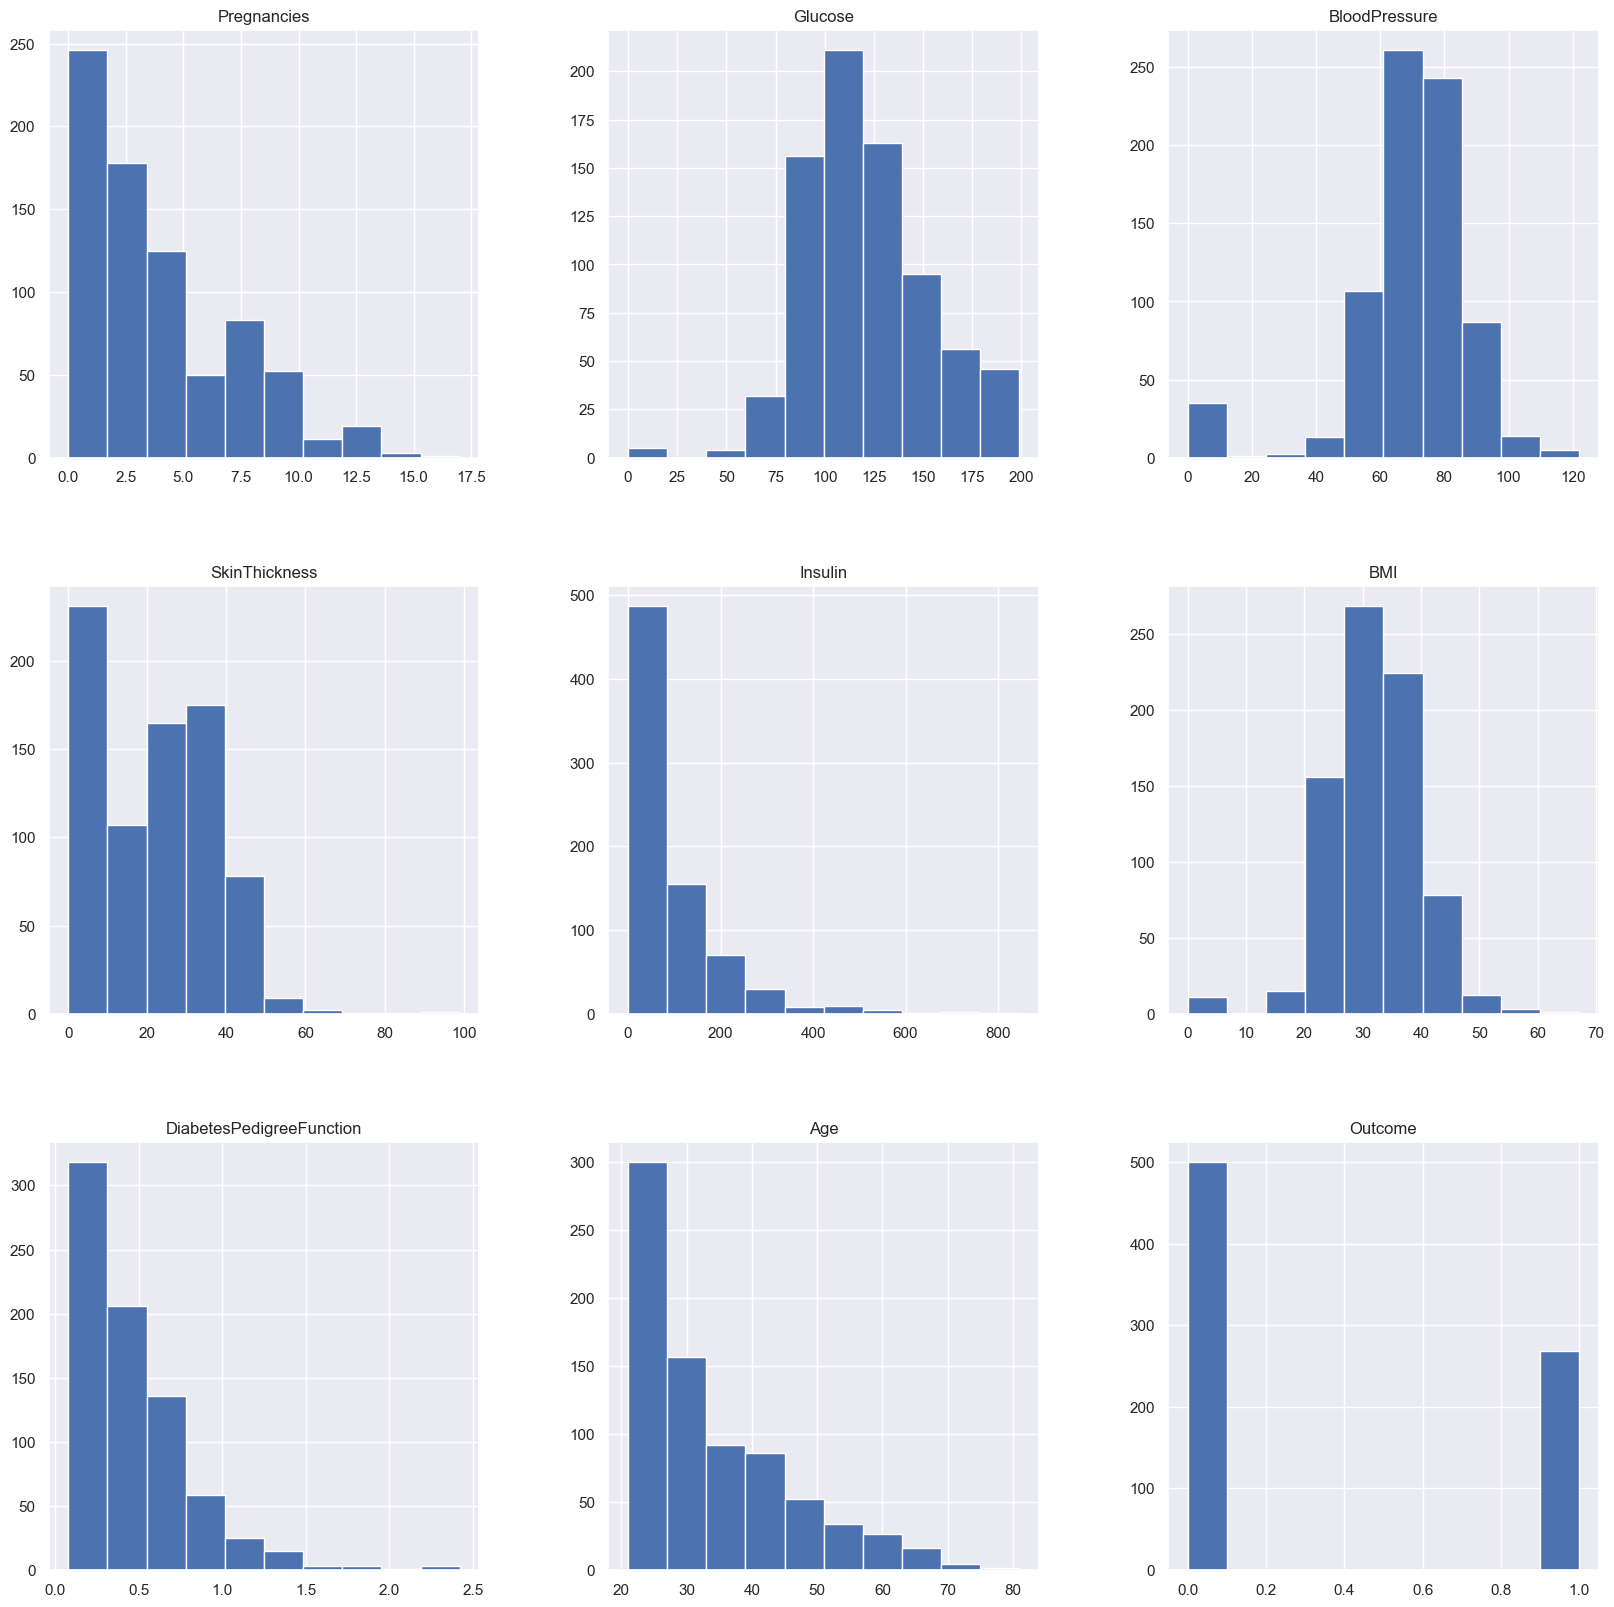

In [10]:
# Plotting the data distribution plots before removing null values - Good to see the range od data also  
p = df.hist(figsize = (20,20))

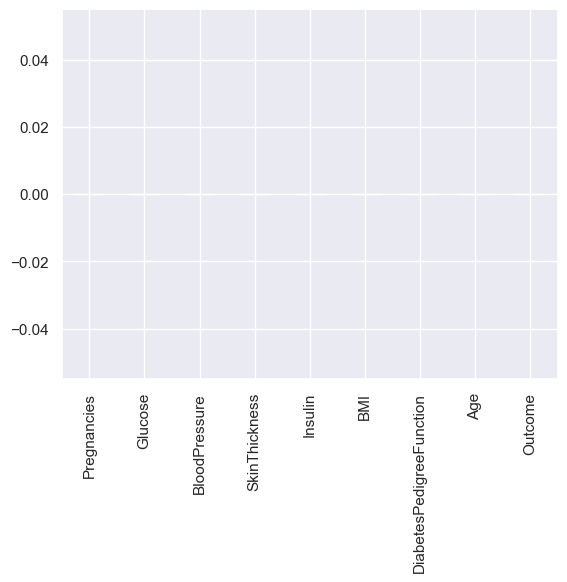

In [11]:
# Check NULL and not null values count in data set 
k=(df.isnull().sum()).plot(kind="bar")


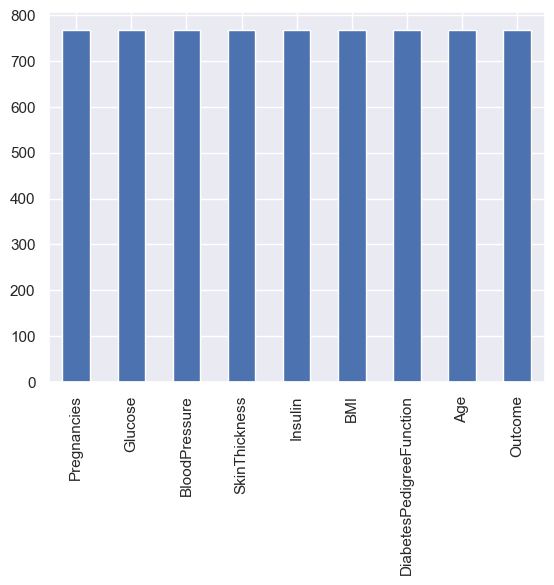

In [12]:
l=(df.notnull().sum()).plot(kind="bar")


Inference: No NULL value is present in the dataset now.

0    500
1    268
Name: Outcome, dtype: int64


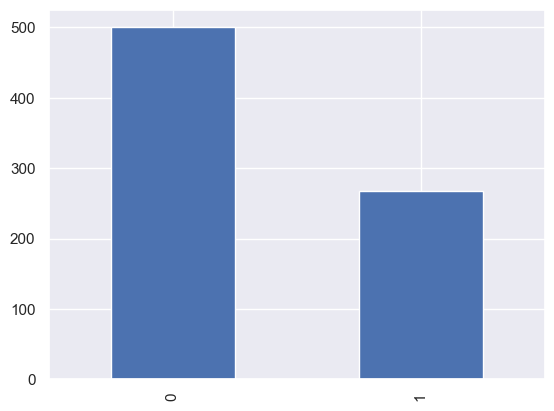

In [13]:
# Now, let's check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")


Inference : Here from the above visualization it is clearly visible that our dataset is completely imbalanced infact the number of patient who is diabetic is half of the patients who are non-diabetic

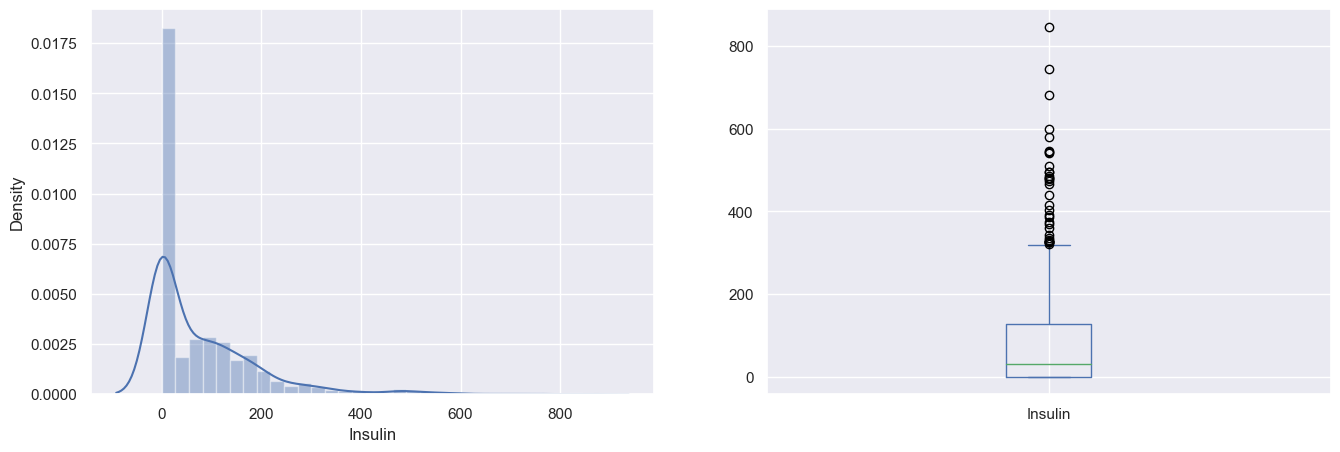

In [14]:
# distplot can be helpful where one will able to see the distribution of the data 
plt.subplot(121), sns.distplot(df['Insulin'])

# with boxplot one can see the outliers in that column
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))

plt.show()

Correlation between all the features

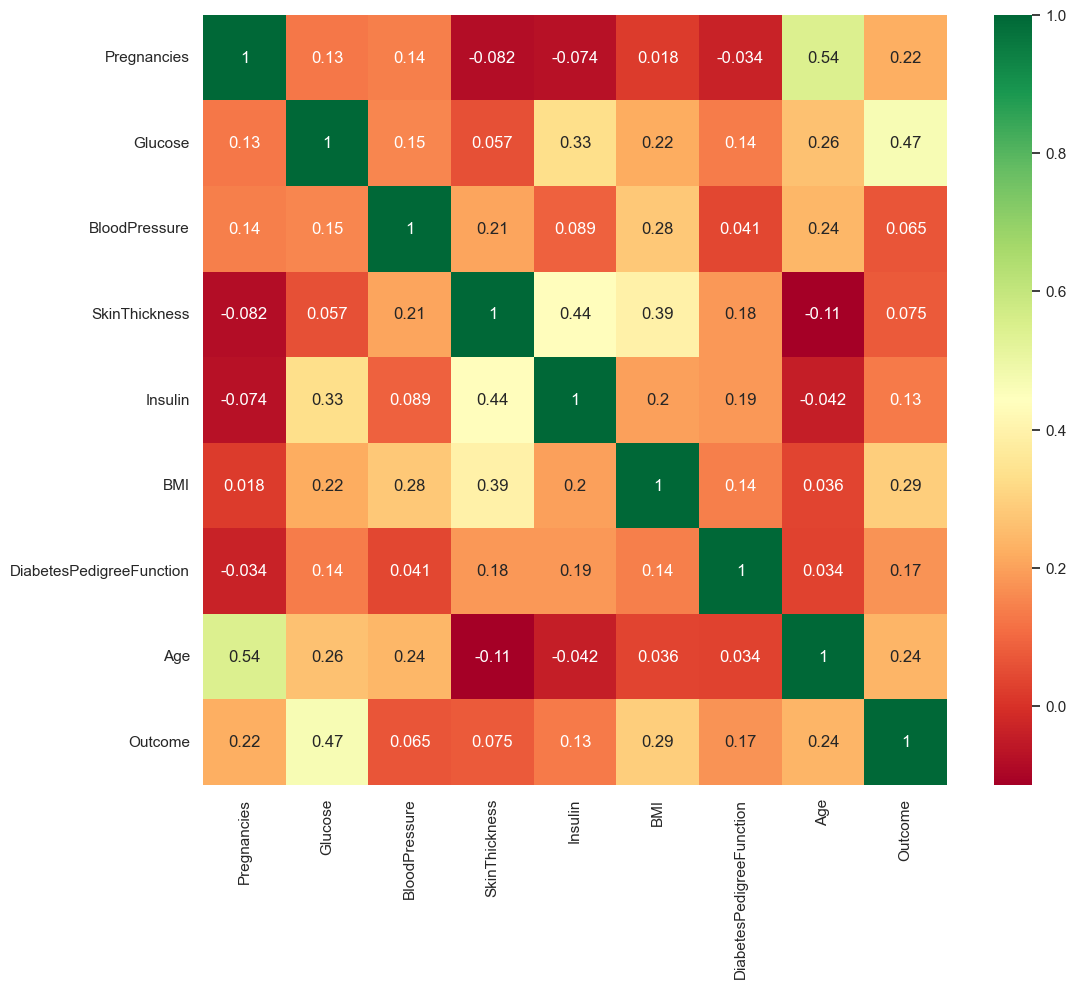

In [15]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has a

Scaling the dataset 

In [16]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
def get_different_rows(source_df, new_df):
    """Returns just the rows from the new dataframe that differ from the source dataframe"""
    merged_df = source_df.merge(new_df, indicator=True, how='outer')
    changed_rows_df = merged_df[merged_df['_merge'] == 'right_only']
    return changed_rows_df.drop('_merge', axis=1)
get_different_rows(df,df_copy)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
768,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
769,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
770,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
771,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
772,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
1139,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
1140,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
1141,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
1142,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [18]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


In [21]:
y = df_copy.Outcome
# unique labels of diabetes outcome
y.unique()

array([1, 0], dtype=int64)

In [23]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


Model Building
Splitting the dataset

In [24]:
#Splitting the dataset

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [26]:
#Check columns with zero values - checking this time so that right data should go for model training
diabetes_df=df
print("Total number of rows: {0}", format(len(diabetes_df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(diabetes_df.loc[diabetes_df['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(diabetes_df.loc[diabetes_df['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(diabetes_df.loc[diabetes_df['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(diabetes_df.loc[diabetes_df['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(diabetes_df.loc[diabetes_df['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(diabetes_df.loc[diabetes_df['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(diabetes_df.loc[diabetes_df['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(diabetes_df.loc[diabetes_df['Age']==0])))

Total number of rows: {0} 768
Number of rows missing Pregnancies: {0} 111
Number of rows missing Glucose: {0} 5
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 227
Number of rows missing Insulin: {0} 374
Number of rows missing BMI: {0} 11
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [27]:
#Imputing zeros values in the dataset

from sklearn.impute import SimpleImputer
import numpy as np

fill_values = SimpleImputer(missing_values=0, strategy='mean')
x_train = fill_values.fit_transform(X_train)
x_test = fill_values.fit_transform(X_test)

In [71]:
#pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.2/70.9 MB 5.3 MB/s eta 0:00:14
                                              0.4/70.9 MB 5.1 MB/s eta 0:00:14
                                              0.8/70.9 MB 6.1 MB/s eta 0:00:12
                                              1.2/70.9 MB 7.0 MB/s eta 0:00:10
                                              1.7/70.9 MB 7.9 MB/s eta 0:00:09
     -                                        2.3/70.9 MB 8.6 MB/s eta 0:00:08
     -                                        2.8/70.9 MB 9.4 MB/s eta 0:00:08
     -                                        3.4/70.9 MB 10.0 MB/s eta 0:00:07
     --                                       3.8/70.9 MB 9.6 MB/s eta 0:00:07
     --                                       4.3/70.9 MB 9.8 MB/s eta 0:00:07
     --                                       4.9/70.9 MB 10.0 MB/s eta 0:00:07
     --                                       5.2/70.9 MB

In [28]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


#1. RandomForest Model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
# On training data
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [30]:
predictions = rfc.predict(X_test)

In [31]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7519685039370079


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[134  28]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       162
           1       0.67      0.62      0.64        92

    accuracy                           0.75       254
   macro avg       0.73      0.72      0.73       254
weighted avg       0.75      0.75      0.75       254



In [33]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)



DecisionTreeClassifier()

In [35]:
predictions = dtree.predict(X_test)

In [36]:
#Getting the accuracy score for Decision Tree

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7244094488188977


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[132  30]
 [ 40  52]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       162
           1       0.63      0.57      0.60        92

    accuracy                           0.72       254
   macro avg       0.70      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



In [38]:
#Building model using XGBoost

from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
xgb_pred = xgb_model.predict(X_test)

In [41]:
#Getting accuracy score for XGBoost

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

Accuracy Score = 0.7401574803149606


In [42]:
#Metrics for XGBoost
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[131  31]
 [ 35  57]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       162
           1       0.65      0.62      0.63        92

    accuracy                           0.74       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.74      0.74      0.74       254



In [90]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC(kernel='linear',probability=True)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [91]:
#Predict
svc_pred = svc_model.predict(X_test)

In [92]:
svc_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [64]:
#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7834645669291339


In [65]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[144  18]
 [ 37  55]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       162
           1       0.75      0.60      0.67        92

    accuracy                           0.78       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254



In [66]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[144  18]
 [ 37  55]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       162
           1       0.75      0.60      0.67        92

    accuracy                           0.78       254
   macro avg       0.77      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254



Selection of Model : SVC for its highest accuracy and lowest False Negative score

Lets inspect its features more and order of importance

Text(0.5, 0, 'Permutation Importance')

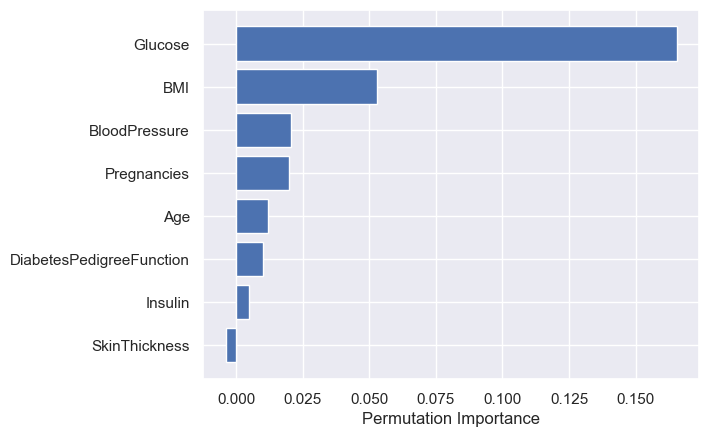

In [83]:
# SVC Features importance 
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

perm_importance = permutation_importance(svc_model, X_test, y_test)

# lets get the names of features 
feature_names = X_train.keys()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


In [93]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
svc_model.predict_proba(X_test)

Prediction Probabilities


array([[0.91992717, 0.08007283],
       [0.14999352, 0.85000648],
       [0.31117829, 0.68882171],
       [0.86004382, 0.13995618],
       [0.65869569, 0.34130431],
       [0.5319904 , 0.4680096 ],
       [0.911857  , 0.088143  ],
       [0.687707  , 0.312293  ],
       [0.09115284, 0.90884716],
       [0.86068915, 0.13931085],
       [0.15746369, 0.84253631],
       [0.89758792, 0.10241208],
       [0.28202414, 0.71797586],
       [0.15099821, 0.84900179],
       [0.62528848, 0.37471152],
       [0.80754991, 0.19245009],
       [0.72459879, 0.27540121],
       [0.83996107, 0.16003893],
       [0.83202728, 0.16797272],
       [0.84336085, 0.15663915],
       [0.52139959, 0.47860041],
       [0.72852958, 0.27147042],
       [0.22458496, 0.77541504],
       [0.39053599, 0.60946401],
       [0.81126228, 0.18873772],
       [0.81415549, 0.18584451],
       [0.90547829, 0.09452171],
       [0.56053524, 0.43946476],
       [0.7367714 , 0.2632286 ],
       [0.70213487, 0.29786513],
       [0.

Here from the above graph it is clearly visible that Glucose as a feature has the most importance in this dataset.

Saving model (SVM Classifier)

In [94]:
import pickle
classifier =svc_model
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [95]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
#4th row data 
print(df.loc[[4]])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
4                     2.288   33        1  


In [98]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
random_forest.predict([[0,137,40,35,168,43.1,2.228,33]]) #4th patient

array([1], dtype=int64)

In [99]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [100]:
#4th row data 
print(df.loc[[763]])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  


In [101]:
# putting datapoints in the model it will either return 0 or 1 i.e. person suffering from diabetes or not
random_forest.predict([[10,101,76,48,180,32.9,0.171,63]])  # 763 th patient

array([0], dtype=int64)